In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
train = pd.read_csv('train.csv')
train['IsTrain'] = True

test = pd.read_csv('test.csv')
test['IsTrain'] = False

hprt = pd.concat([train, test], ignore_index=True)

In [66]:
hprt
#Let's check how this data look overall

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,...,2008,WD,Normal,208500.0,True
1,2,20,RL,80.0,9600,...,2007,WD,Normal,181500.0,True
2,3,60,RL,68.0,11250,...,2008,WD,Normal,223500.0,True
3,4,70,RL,60.0,9550,...,2006,WD,Abnorml,140000.0,True
4,5,60,RL,84.0,14260,...,2008,WD,Normal,250000.0,True
...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,...,2006,WD,Normal,NaN,False
2915,2916,160,RM,21.0,1894,...,2006,WD,Abnorml,NaN,False
2916,2917,20,RL,160.0,20000,...,2006,WD,Abnorml,NaN,False
2917,2918,85,RL,62.0,10441,...,2006,WD,Normal,NaN,False


In [67]:
puste = hprt.isnull().sum()
puste = puste[puste != 0].sort_values(ascending=False)
puste
#I'm looking which columns have 'nan' values

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
...,...
BsmtFinSF2,1
GarageCars,1
KitchenQual,1
GarageArea,1


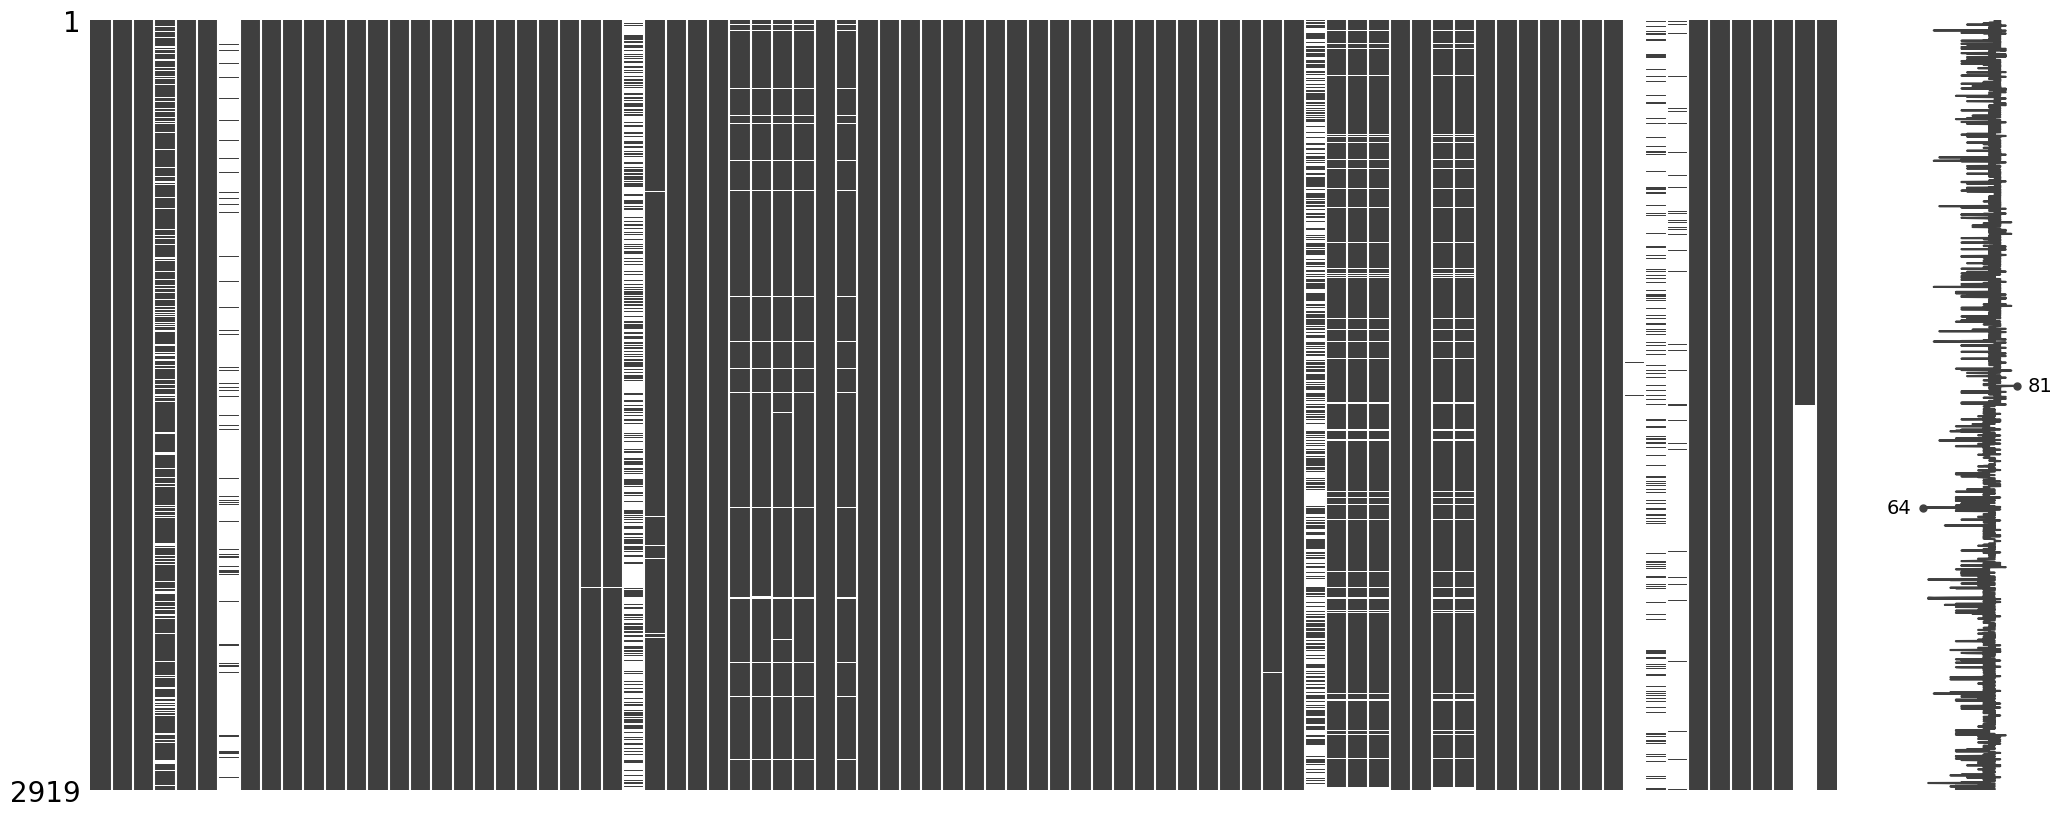

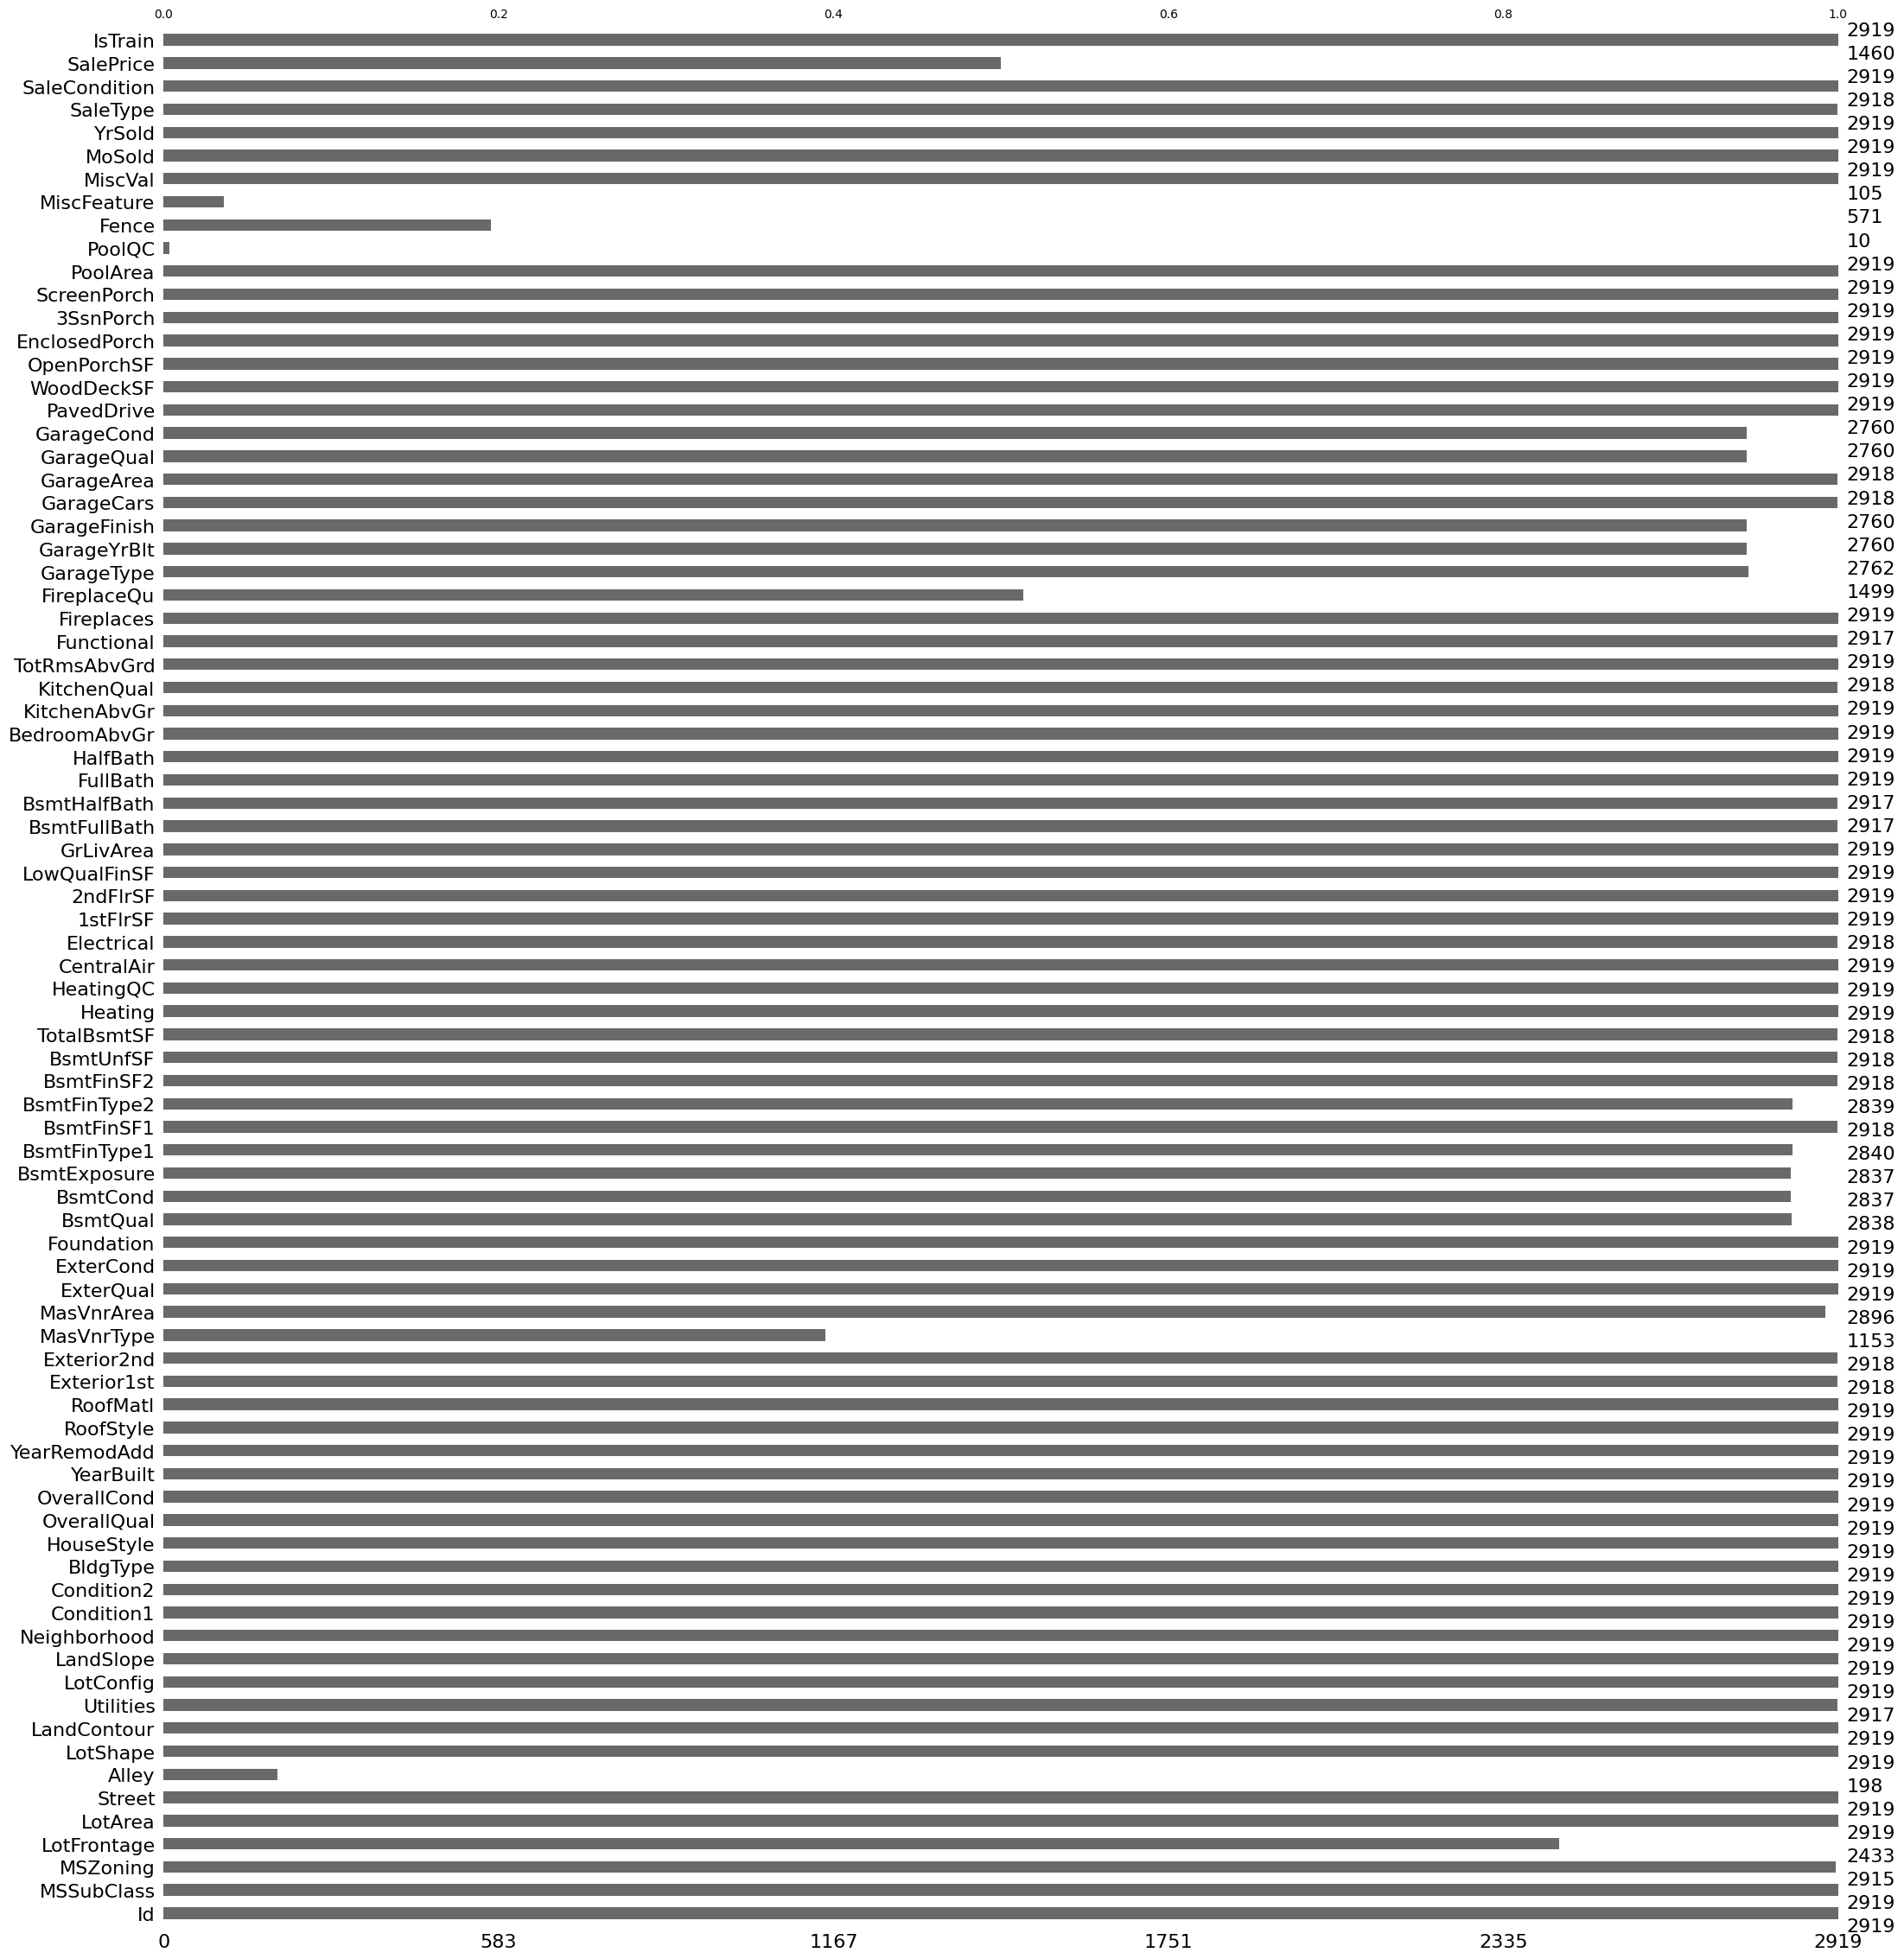

In [68]:
msno.matrix(pd.DataFrame(hprt))
plt.show()

msno.bar(hprt)
plt.show()

#Wizualizacja braków

In [69]:
'''
In the description of data 'nan' in
[PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, GarageType,
GarageFinish, GarageQual,  GarageCond, BsmtExposure, BsmtFinType2, BsmtQual, BsmtFinType1]
means 'No such a thing in this house'
To avoid mistakes I've changed 'nan' values for None
'''

columns_to_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',  'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
hprt[columns_to_fill_none] = hprt[columns_to_fill_none].replace(np.nan, 'None')
puste = hprt.isnull().sum()
puste = puste[puste != 0].sort_values(ascending=False)
puste

,0
SalePrice,1459
LotFrontage,486
GarageYrBlt,159
MasVnrArea,23
MSZoning,4
...,...
BsmtFinSF2,1
KitchenQual,1
GarageCars,1
GarageArea,1


In [70]:
'''
[LotFrontage, GarageYrBlt, MasVnrArea]
[Electrical]
[]
'''
hprt['GarageYrBlt'] = hprt['GarageYrBlt'].replace(np.nan, 0)
hprt['GarageFlag'] = hprt['GarageYrBlt'].apply(lambda x: 0 if x == 0 else 1)
hprt.loc[hprt['GarageYrBlt']==0, ['GarageFlag', 'GarageYrBlt']]

,GarageFlag,GarageYrBlt
39,0,0.0
48,0,0.0
78,0,0.0
88,0,0.0
89,0,0.0
...,...,...
2893,0,0.0
2909,0,0.0
2913,0,0.0
2914,0,0.0


In [71]:
puste = hprt.isnull().sum()
puste = puste[puste != 0].sort_values(ascending=False)
puste

,0
SalePrice,1459
LotFrontage,486
MasVnrArea,23
MSZoning,4
Utilities,2
...,...
BsmtFinSF2,1
KitchenQual,1
GarageCars,1
GarageArea,1


<Axes: >

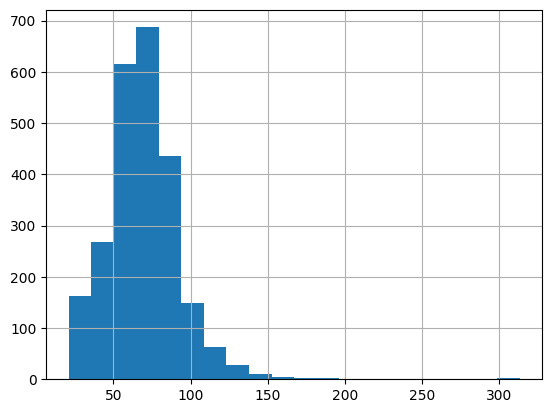

In [72]:
'''
[LotFrontage, MasVnrArea, Electrical]
'''
hprt['LotFrontage'].hist(bins=20)

In [73]:
hprt.loc[hprt['LotFrontage'].isna(), 'Neighborhood'].unique()

array(['NWAmes', 'Sawyer', 'NAmes', 'SawyerW', 'CollgCr', 'Gilbert',
       'IDOTRR', 'Crawfor', 'ClearCr', 'NPkVill', 'Timber', 'BrkSide',
       'Veenker', 'OldTown', 'Somerst', 'Mitchel', 'Edwards', 'Blmngtn',
       'StoneBr', 'MeadowV', 'NoRidge', 'SWISU', 'NridgHt'], dtype=object)

In [74]:
hprt['LotFrontage'] = hprt['LotFrontage'].fillna(
    hprt.groupby('Neighborhood')['LotFrontage'].transform('median')
)

In [75]:
hprt['MasVnrArea'] = hprt['MasVnrArea'].fillna(0)

In [76]:
hprt.loc[hprt['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,SaleType,SaleCondition,SalePrice,IsTrain,GarageFlag
1379,1380,80,RL,73.0,9735,...,WD,Normal,167500.0,True,1


In [77]:
hprt = hprt[hprt['Electrical'].notna()]

In [78]:
puste = hprt.isnull().sum()
puste = puste[puste != 0].sort_values(ascending=False)
puste

,0
SalePrice,1459
MSZoning,4
BsmtFullBath,2
Utilities,2
BsmtHalfBath,2
...,...
BsmtFinSF1,1
KitchenQual,1
GarageCars,1
GarageArea,1


In [79]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)


hprt.dtypes.value_counts()

,count
object,43
int64,27
float64,12
bool,1


In [80]:
hprtMod = pd.get_dummies(hprt, drop_first=True)
hprtMod.shape

(2918, 263)

In [81]:
hprtMod.dtypes.value_counts()

,count
bool,224
int64,27
float64,12


In [82]:
hprt['MSZoning']

,MSZoning
0,RL
1,RL
2,RL
3,RL
4,RL
...,...
2914,RM
2915,RM
2916,RL
2917,RL


In [83]:
imputer = SimpleImputer(strategy = "most_frequent")
hprt[['MSZoning']] = imputer.fit_transform(hprt[['MSZoning']])

/tmp/ipython-input-2498749584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt[['MSZoning']] = imputer.fit_transform(hprt[['MSZoning']])


In [84]:
hprt['BsmtFullBath'] = hprt['BsmtFullBath'].fillna(0)

/tmp/ipython-input-3599348617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['BsmtFullBath'] = hprt['BsmtFullBath'].fillna(0)


In [85]:
hprt[['Utilities']] = imputer.fit_transform(hprt[['Utilities']])

/tmp/ipython-input-1477040731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt[['Utilities']] = imputer.fit_transform(hprt[['Utilities']])


In [86]:
hprt['BsmtHalfBath'] = hprt['BsmtHalfBath'].fillna(0)

/tmp/ipython-input-1245967011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['BsmtHalfBath'] = hprt['BsmtHalfBath'].fillna(0)


In [87]:
hprt[['Functional']] = imputer.fit_transform(hprt[['Functional']])

/tmp/ipython-input-1230895777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt[['Functional']] = imputer.fit_transform(hprt[['Functional']])


In [88]:
hprt['Exterior1st'] = hprt['Exterior1st'].fillna('Other')

/tmp/ipython-input-846479763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['Exterior1st'] = hprt['Exterior1st'].fillna('Other')


In [89]:
hprt['Exterior2nd'] = hprt['Exterior2nd'].fillna('Other')

/tmp/ipython-input-2193416470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['Exterior2nd'] = hprt['Exterior2nd'].fillna('Other')


In [90]:
hprt['TotalBsmtSF'] = hprt['TotalBsmtSF'].fillna(0)

/tmp/ipython-input-2759596573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['TotalBsmtSF'] = hprt['TotalBsmtSF'].fillna(0)


In [91]:
hprt['BsmtUnfSF'] = hprt['BsmtUnfSF'].fillna(0)

/tmp/ipython-input-3709428821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['BsmtUnfSF'] = hprt['BsmtUnfSF'].fillna(0)


In [92]:
hprt['BsmtFinSF2'] = hprt['BsmtFinSF2'].fillna(0)

/tmp/ipython-input-2662149061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['BsmtFinSF2'] = hprt['BsmtFinSF2'].fillna(0)


In [93]:
hprt['BsmtFinSF1'] = hprt['BsmtFinSF1'].fillna(0)

/tmp/ipython-input-4221981824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['BsmtFinSF1'] = hprt['BsmtFinSF1'].fillna(0)


In [94]:
hprt[['KitchenQual']] = imputer.fit_transform(hprt[['KitchenQual']])

/tmp/ipython-input-3718123532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt[['KitchenQual']] = imputer.fit_transform(hprt[['KitchenQual']])


In [95]:
hprt['GarageCars'] = hprt['GarageCars'].fillna(0)

/tmp/ipython-input-494739755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['GarageCars'] = hprt['GarageCars'].fillna(0)


In [96]:
hprt['GarageArea'] = hprt['GarageArea'].fillna(0)

/tmp/ipython-input-3354845825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['GarageArea'] = hprt['GarageArea'].fillna(0)


In [97]:
hprt['SaleType'] = hprt['SaleType'].fillna('Oth')

/tmp/ipython-input-2670630076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprt['SaleType'] = hprt['SaleType'].fillna('Oth')


In [98]:
puste = hprt.isnull().sum()
puste = puste[puste != 0].sort_values(ascending=False)
puste

,0
SalePrice,1459


In [99]:
hprtMod = pd.get_dummies(hprt, drop_first=True)
hprtMod.shape

(2918, 264)

In [100]:
testDF = hprtMod[hprtMod["IsTrain"]==False].copy()
testDF

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,5,...,False,False,False,True,False
1461,1462,20,81.0,14267,6,...,False,False,False,True,False
1462,1463,60,74.0,13830,5,...,False,False,False,True,False
1463,1464,60,78.0,9978,6,...,False,False,False,True,False
1464,1465,120,43.0,5005,8,...,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,...,False,False,False,True,False
2915,2916,160,21.0,1894,4,...,False,False,False,False,False
2916,2917,20,160.0,20000,5,...,False,False,False,False,False
2917,2918,85,62.0,10441,5,...,False,False,False,True,False


In [101]:
trainDF = hprtMod[hprtMod["IsTrain"]==True].copy()
trainDF

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,...,False,False,False,True,False
1,2,20,80.0,9600,6,...,False,False,False,True,False
2,3,60,68.0,11250,7,...,False,False,False,True,False
3,4,70,60.0,9550,7,...,False,False,False,False,False
4,5,60,84.0,14260,8,...,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,...,False,False,False,True,False
1456,1457,20,85.0,13175,6,...,False,False,False,True,False
1457,1458,70,66.0,9042,7,...,False,False,False,True,False
1458,1459,20,68.0,9717,5,...,False,False,False,True,False


In [102]:
print(f'Shape: {trainDF.shape}\n\nData types: ')
print(trainDF.dtypes.value_counts())
print(f'\n{trainDF.info()}')
print(f'\n{trainDF.describe()}')

Shape: (1459, 264)

Data types: 
bool       225
int64       27
float64     12
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 264 entries, Id to SaleCondition_Partial
dtypes: bool(225), float64(12), int64(27)
memory usage: 776.5 KB

None

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  ...  \
count  1459.000000  1459.000000  1459.000000    1459.000000  1459.000000  ...   
mean    730.054832    56.881426    70.174435   10517.363948     6.100069  ...   
std     421.411181    42.310746    22.441027    9984.666267     1.383171  ...   
min       1.000000    20.000000    21.000000    1300.000000     1.000000  ...   
25%     365.500000    20.000000    60.000000    7549.000000     5.000000  ...   
50%     730.000000    50.000000    70.000000    9477.000000     6.000000  ...   
75%    1094.500000    70.000000    80.000000   11603.000000     7.000000  ...   
max    1460.000000   190.000000   313.000000  215245.0000

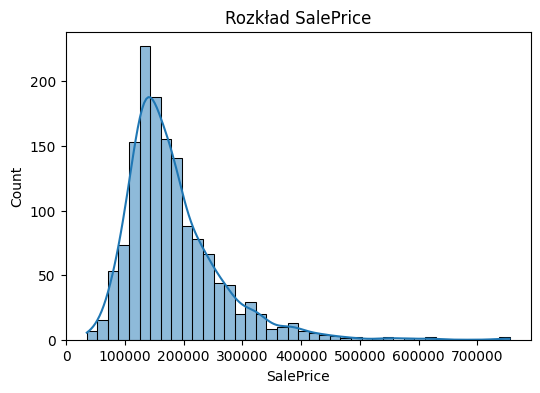

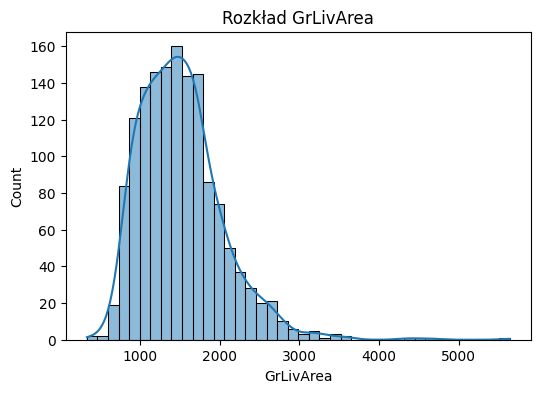

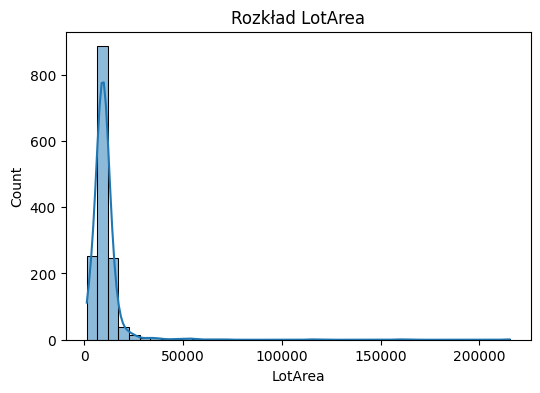

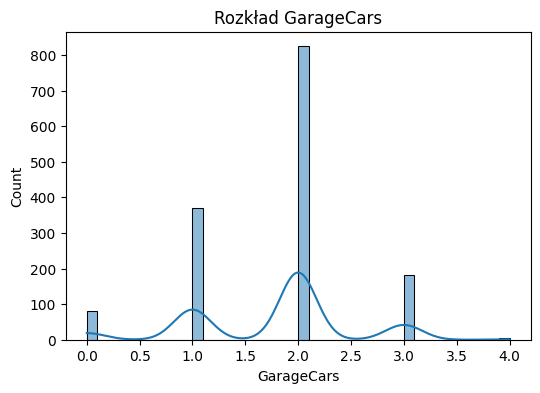

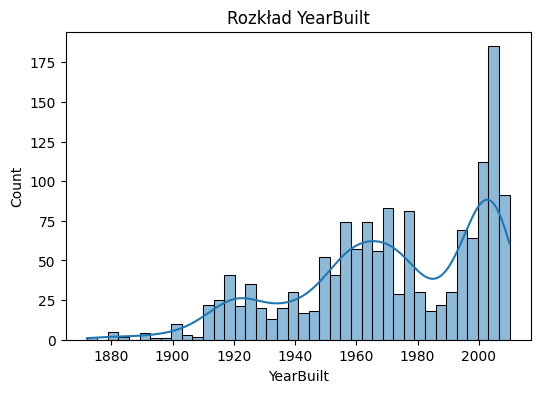

In [103]:
features = ["SalePrice", "GrLivArea", "LotArea", "GarageCars", "YearBuilt"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(train[col], kde=True, bins=40)
    plt.title(f"Rozkład {col}")
    plt.show()


#SalePrice, GrLivArea, LotArea - to rozkłady skośne, prawostronnie

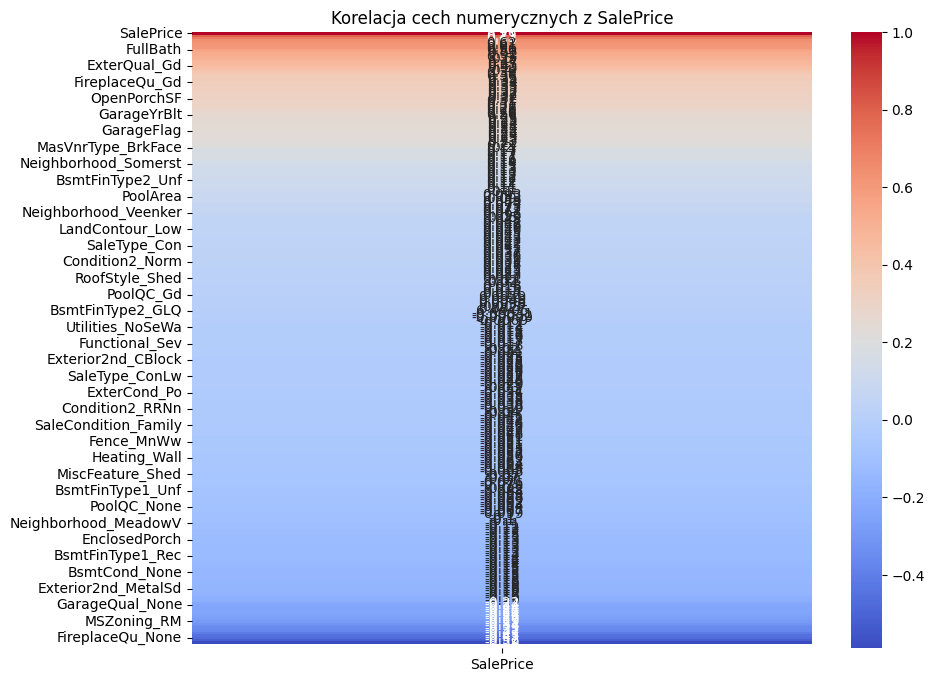

In [104]:
corr = trainDF.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Korelacja cech numerycznych z SalePrice")
plt.show()

In [105]:
X = trainDF.drop(columns = ['SalePrice', 'Id', 'IsTrain'])
y = np.log1p(trainDF['SalePrice'])
#Zmienna zależna ma rozkład skośny prawostronnie,
#dlatego robię transformację logarytmiczną
#PAMIĘTAĆ O EXP() PRZY OBLICZANIU W DRUGĄ STRONĘ

<Axes: xlabel='SalePrice', ylabel='Count'>

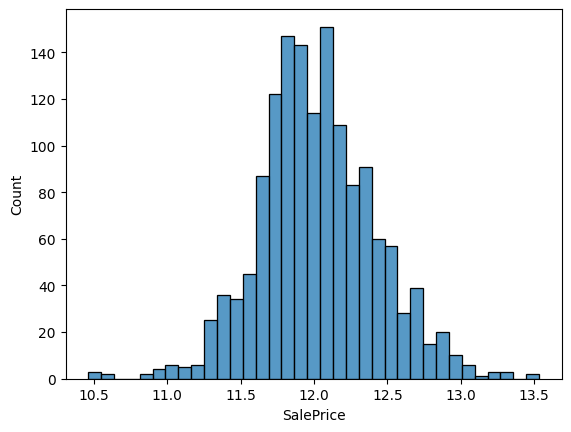

In [106]:
sns.histplot(y)

In [107]:
pd.DataFrame([y, trainDF['SalePrice']]).T

,SalePrice,SalePrice
0,12.247699,208500.0
1,12.109016,181500.0
2,12.317171,223500.0
3,11.849405,140000.0
4,12.429220,250000.0
...,...,...
1455,12.072547,175000.0
1456,12.254868,210000.0
1457,12.493133,266500.0
1458,11.864469,142125.0


In [108]:
#Pipeline

num_features = X.columns

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)



model = Pipeline(steps=[
    ("regressor", RandomForestRegressor(
        n_estimators = 500,
        max_depth = None,
        random_state = 42,
    ))
])

model.fit(X_train, y_train)

Pipeline(steps=[('regressor',
                 RandomForestRegressor(n_estimators=500, random_state=42))])

In [109]:
y_pred = model.predict(X_valid)
y_predEXP = pd.DataFrame(np.exp(y_pred))
#EXP, bo y był zlogarytmowany w celu normalizacji rozkładu

y_predEXP

,0
0,84082.253242
1,139567.018020
2,111485.954663
3,149223.386378
4,89792.298745
...,...
287,115712.148995
288,148590.133784
289,209247.279076
290,184563.628112


<Axes: ylabel='Count'>

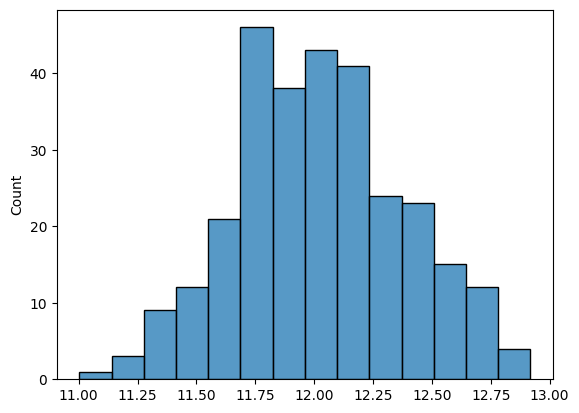

In [110]:
sns.histplot(y_pred)

<Axes: ylabel='Count'>

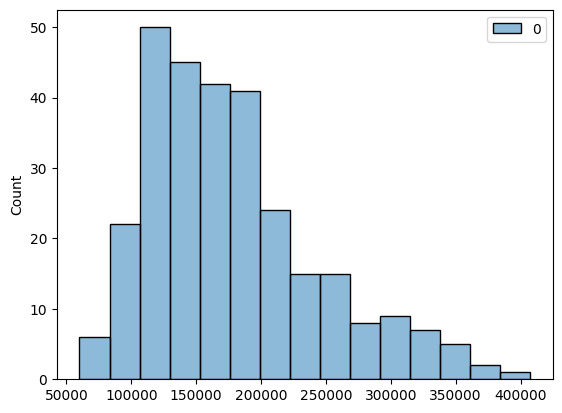

In [111]:
sns.histplot(y_predEXP)

In [112]:
#log scale
rmse_log = np.sqrt(mean_squared_error(y_valid, y_pred))
mae_log = mean_absolute_error(y_valid, y_pred)
r2_log = r2_score(y_valid, y_pred)

#exp scale
rmse_orig = np.sqrt(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred)))
mae_orig = mean_absolute_error(np.expm1(y_valid), np.expm1(y_pred))

print(f"RMSE (log): ", {rmse_log})
print(f"MAE (log): ", {mae_log})
print(f"R2 (log): ", {r2_log})
print(f"\nRMSE (orig): ", {rmse_orig})
print(f"MAE (orig): ", {mae_orig})

RMSE (log):  {np.float64(0.14428248793074544)}
MAE (log):  {0.09730887591564606}
R2 (log):  {0.8791403271363546}

RMSE (orig):  {np.float64(23075.195267259543)}
MAE (orig):  {16345.949435260261}


In [114]:
testPRED = testDF.drop(['Id', 'IsTrain', 'IsTrain'], axis=1)
testPRED

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,80.0,11622,5,6,...,False,False,False,True,False
1461,20,81.0,14267,6,6,...,False,False,False,True,False
1462,60,74.0,13830,5,5,...,False,False,False,True,False
1463,60,78.0,9978,6,6,...,False,False,False,True,False
1464,120,43.0,5005,8,5,...,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,...,False,False,False,True,False
2915,160,21.0,1894,4,5,...,False,False,False,False,False
2916,20,160.0,20000,5,7,...,False,False,False,False,False
2917,85,62.0,10441,5,5,...,False,False,False,True,False


In [117]:
testPRED = testDF.drop(columns=['Id', 'IsTrain', 'SalePrice'])
np.exp(model.predict(testPRED))

array([126115.70620519, 154352.85977104, 179590.35922139, ...,
       155770.41632269, 109354.03712161, 234350.15174387])

In [126]:
testDF['SalePrice'] = np.exp(model.predict(testPRED))
SUBMISSION = testDF[['Id', 'SalePrice']]
SUBMISSION

,Id,SalePrice
1460,1461,126115.706205
1461,1462,154352.859771
1462,1463,179590.359221
1463,1464,182687.131396
1464,1465,195501.760352
...,...,...
2914,2915,86133.444366
2915,2916,91427.055881
2916,2917,155770.416323
2917,2918,109354.037122


In [127]:
SUBMISSION.to_csv("SUBMISSION.csv", index = False)